# Data698 Final Research Project

## Machine learning approach for predicting the stroke

## By Jun Pan, Ritesh Lohiya and Brian Liles

In [1]:
# Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
%matplotlib inline
from IPython.core.display import HTML
pd.set_option("display.max_columns",210)
import warnings
warnings.filterwarnings('ignore')
import urllib
import json

In [2]:
analysis1 = pd.read_csv('C:/Users/rites/Downloads/TRANS/data/Analysis Data/1-data/CSV/analysis1.csv')

In [3]:
analysis1.describe()

,subjid,visit,DaysFromV1,YearsFromV1,FastHours,age,brthyr,brthmo,alcw,weight,height,waist,neck,BMI,bsa,sbp,dbp,abi,HbA1c,FPG,HbA1cIFCC,fastingInsulin,HOMA_B,HOMA_IR,ldl,hdl,trigs,totchol,LEPTIN,HSCRP,ENDOTHELIN,ALDOSTERONE,cystatinC,sCort,reninRIA,reninIRMA,adiponectin,CreatinineU24hr,AlbuminU24hr,CreatinineUSpot,AlbuminUSpot,SCrCC,SCrIDMS,eGFRmdrd,eGFRckdepi,DialysisDuration,maneuvers,FVC,FEV1,FEV6,FEV1PP,FVCPP,EF,DiastLVdia,SystLVdia,LVMecho,LVMindex,RWT,ecgHR,QRS,QT,QTcFram,QTcBaz,QTcHod,QTcFrid,CV,dailyDiscr,lifetimeDiscrm,discrmBurden,depression,perceivedStress,weeklyStress,vitaminD2,vitaminD3,vitaminD3epimer,darkgrnVeg,eggs,fish,FakeCensusTractID,nbmedHHincome,nbpctpoverty,nbpctBlackNH,nbpctWhiteNH,nbSESpc2score,nbSESanascore,nbProblems,nbCohesion,nbViolence,nbK3FavorFoodstore,nbK3paFacilities,nbpctResiden1mi,nbPopDensity1mi,sportIndex,hyIndex,activeIndex,rrs_tenyrrisk,ascvd_tenyrrisk
count,2653.000000,2653.0,2653.0,2653.0,2647.000000,2653.000000,2653.000000,2653.000000,2582.000000,2649.000000,2650.000000,2648.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2409.000000,2565.000000,2468.000000,2565.000000,2458.000000,2006.000000,2006.00000,2444.000000,2456.000000,2456.000000,2456.000000,2595.000000,2610.000000,2609.000000,2609.000000,2588.000000,2609.000000,1185.000000,1417.000000,2573.000000,621.000000,619.000000,1292.000000,1292.000000,2620.000000,2620.000000,2620.000000,2620.000000,5.000000,2550.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2568.000000,1774.000000,1773.000000,1772.000000,1770.000000,1772.000000,2647.000000,2604.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2613.000000,2573.000000,2249.000000,1836.000000,2627.000000,1612.000000,1309.000000,2593.000000,1847.000000,2438.000000,2438.000000,2438.000000,2588.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2644.000000,2644.000000,2643.000000,2647.000000,2647.000000,2293.000000,2647.000000,2536.000000,2627.000000,2639.000000,2008.000000,2084.000000
mean,1378.106672,1.0,0.0,0.0,12.824605,53.776856,1947.960422,6.401809,1.612734,91.283163,169.338491,100.652568,38.587769,31.849049,2.009826,126.081880,75.826735,1.221914,5.872827,97.424635,40.690472,17.617575,224.593137,3.52315,126.515139,51.679967,103.912459,199.031759,27.920039,0.484129,1.314067,5.609237,0.718833,9.566692,1.508920,10.822512,5069.481041,1.469726,25.636834,151.550310,3.312415,0.998920,0.904137,87.507985,96.542107,10.600000,4.521569,3.025343,2.443316,2.967350,92.307039,90.951857,62.061916,49.509397,30.103271,147.002410,35.491169,0.346710,63.559124,93.635177,414.956177,419.936910,424.106913,421.277295,420.740083,1472.543257,2.117367,3.149242,2.342597,10.481481,5.323182,81.744417,2.570466,13.182997,0.524234,0.358302,0.519036,0.176485,134.021638,33963.003022,0.232539,0.787321,0.195731,0.599513,-2.485077,1.555601,3.016131,1.256973,0.261326,0.442100,0.314413,2066.746320,2.213525,2.310278,2.115195,0.039587,0.098623
std,794.509459,0.0,0.0,0.0,3.299548,11.718382,11.985487,3.493350,5.067970,20.823439,9.375707,15.884671,3.724148,6.932852,0.229844,15.479804,8.555552,0.152030,1.098924,25.430919,12.011153,11.626400,121.747463,2.01814,35.820849,13.953785,59.498112,38.574495,22.075524,0.652177,0.537623,4.332922,0.162588,3.813269,4.354125,16.548478,3576.136045,0.517087,76.820353,74.582316,11.098856,0.209454,0.217024,16.793723,20.002933,11.502174,1.429158,0.822750,0.680243,0.799871,16.445593,15.633830,6.814566,4.275055,4.676188,38.170148,8.873661,0.054419,10.097231,13.424959,30.559416,23.024671,26.101673,23.064523,22.939132,632.691849,1.014663,2.104270,0.772610,7.667347,4.366171,78.451773,3.830667,6.069261,0.377062,0.322408,0.594853,0.353986,73.825772,15406.322898,0.125761,0.272994,0.267583,0.646885,3.716818,0.186027,0.121804,0.120088,0.209128,0.358621,0.109447,1262.469069,1.241996,0.611462,0.787773,0.041655,0.083919
min,1.000000,1.0,0.0,0.0,0.950000,23.000000,1922.000000,1.000000,0.000000,50.000000,150.000000,67.0

In [4]:
#analysis1

In [5]:
stroke = pd.read_csv('C:/Users/rites/Downloads/TRANS/data/Analysis Data/1-data/CSV/incevtstroke.csv')

In [6]:
stroke

,subjid,stroke,V1date,date,year,years,days,Status
0,115,No,01/22/2001,12/26/2014,2014.0,13.924709,5086.0,No Stroke
1,2307,Yes,02/24/2001,08/23/2013,2013.0,12.492813,4563.0,Ischemic Stroke
2,1668,No,11/02/2001,01/01/2015,2014.0,13.163587,4808.0,No Stroke
3,1616,Yes,04/20/2001,08/10/2010,2010.0,9.305955,3399.0,Ischemic Stroke
4,1753,No,04/22/2001,01/01/2015,2014.0,13.694730,5002.0,No Stroke
...,...,...,...,...,...,...,...,...
2648,494,NaN,03/21/2004,NaN,NaN,NaN,NaN,Stroke Hx
2649,1965,No,03/28/2004,01/02/2015,2014.0,10.765229,3932.0,No Stroke
2650,1812,No,03/29/2004,01/02/2015,2014.0,10.762491,3931.0,No Stroke
2651,92,No,03/25/2004,12/26/2014,2014.0,10.754278,3928.0,No Stroke


In [7]:
stroke.describe()

,subjid,year,years,days
count,2653.000000,2514.000000,2514.000000,2514.000000
mean,1378.106672,2013.582737,11.807916,4312.841289
std,794.509459,1.390275,1.732415,632.764744
min,1.000000,2002.000000,0.114990,42.000000
25%,693.000000,2014.000000,11.164956,4078.000000
50%,1380.000000,2014.000000,11.978097,4375.000000
75%,2067.000000,2014.000000,12.815195,4680.750000
max,2750.000000,2014.000000,14.250513,5205.000000


In [8]:
df = pd.merge(analysis1, stroke, on='subjid')

In [9]:
#df

In [10]:
df.columns

Index(['subjid', 'visit', 'VisitDate', 'DaysFromV1', 'YearsFromV1', 'ARIC',
       'recruit', 'ageIneligible', 'FastHours', 'age',
       ...
       'frs_atpiii_tenyrrisk', 'rrs_tenyrrisk', 'ascvd_tenyrrisk', 'stroke',
       'V1date', 'date', 'year', 'years', 'days', 'Status'],
      dtype='object', length=211)

In [11]:
df.dtypes

subjid           int64
visit            int64
VisitDate       object
DaysFromV1       int64
YearsFromV1      int64
                ...   
date            object
year           float64
years          float64
days           float64
Status          object
Length: 211, dtype: object

In [12]:
df.shape

(2653, 211)

In [13]:
df.describe()

,subjid,visit,DaysFromV1,YearsFromV1,FastHours,age,brthyr,brthmo,alcw,weight,height,waist,neck,BMI,bsa,sbp,dbp,abi,HbA1c,FPG,HbA1cIFCC,fastingInsulin,HOMA_B,HOMA_IR,ldl,hdl,trigs,totchol,LEPTIN,HSCRP,ENDOTHELIN,ALDOSTERONE,cystatinC,sCort,reninRIA,reninIRMA,adiponectin,CreatinineU24hr,AlbuminU24hr,CreatinineUSpot,AlbuminUSpot,SCrCC,SCrIDMS,eGFRmdrd,eGFRckdepi,DialysisDuration,maneuvers,FVC,FEV1,FEV6,FEV1PP,FVCPP,EF,DiastLVdia,SystLVdia,LVMecho,LVMindex,RWT,ecgHR,QRS,QT,QTcFram,QTcBaz,QTcHod,QTcFrid,CV,dailyDiscr,lifetimeDiscrm,discrmBurden,depression,perceivedStress,weeklyStress,vitaminD2,vitaminD3,vitaminD3epimer,darkgrnVeg,eggs,fish,FakeCensusTractID,nbmedHHincome,nbpctpoverty,nbpctBlackNH,nbpctWhiteNH,nbSESpc2score,nbSESanascore,nbProblems,nbCohesion,nbViolence,nbK3FavorFoodstore,nbK3paFacilities,nbpctResiden1mi,nbPopDensity1mi,sportIndex,hyIndex,activeIndex,rrs_tenyrrisk,ascvd_tenyrrisk,year,years,days
count,2653.000000,2653.0,2653.0,2653.0,2647.000000,2653.000000,2653.000000,2653.000000,2582.000000,2649.000000,2650.000000,2648.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2409.000000,2565.000000,2468.000000,2565.000000,2458.000000,2006.000000,2006.00000,2444.000000,2456.000000,2456.000000,2456.000000,2595.000000,2610.000000,2609.000000,2609.000000,2588.000000,2609.000000,1185.000000,1417.000000,2573.000000,621.000000,619.000000,1292.000000,1292.000000,2620.000000,2620.000000,2620.000000,2620.000000,5.000000,2550.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2568.000000,1774.000000,1773.000000,1772.000000,1770.000000,1772.000000,2647.000000,2604.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2613.000000,2573.000000,2249.000000,1836.000000,2627.000000,1612.000000,1309.000000,2593.000000,1847.000000,2438.000000,2438.000000,2438.000000,2588.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2644.000000,2644.000000,2643.000000,2647.000000,2647.000000,2293.000000,2647.000000,2536.000000,2627.000000,2639.000000,2008.000000,2084.000000,2514.000000,2514.000000,2514.000000
mean,1378.106672,1.0,0.0,0.0,12.824605,53.776856,1947.960422,6.401809,1.612734,91.283163,169.338491,100.652568,38.587769,31.849049,2.009826,126.081880,75.826735,1.221914,5.872827,97.424635,40.690472,17.617575,224.593137,3.52315,126.515139,51.679967,103.912459,199.031759,27.920039,0.484129,1.314067,5.609237,0.718833,9.566692,1.508920,10.822512,5069.481041,1.469726,25.636834,151.550310,3.312415,0.998920,0.904137,87.507985,96.542107,10.600000,4.521569,3.025343,2.443316,2.967350,92.307039,90.951857,62.061916,49.509397,30.103271,147.002410,35.491169,0.346710,63.559124,93.635177,414.956177,419.936910,424.106913,421.277295,420.740083,1472.543257,2.117367,3.149242,2.342597,10.481481,5.323182,81.744417,2.570466,13.182997,0.524234,0.358302,0.519036,0.176485,134.021638,33963.003022,0.232539,0.787321,0.195731,0.599513,-2.485077,1.555601,3.016131,1.256973,0.261326,0.442100,0.314413,2066.746320,2.213525,2.310278,2.115195,0.039587,0.098623,2013.582737,11.807916,4312.841289
std,794.509459,0.0,0.0,0.0,3.299548,11.718382,11.985487,3.493350,5.067970,20.823439,9.375707,15.884671,3.724148,6.932852,0.229844,15.479804,8.555552,0.152030,1.098924,25.430919,12.011153,11.626400,121.747463,2.01814,35.820849,13.953785,59.498112,38.574495,22.075524,0.652177,0.537623,4.332922,0.162588,3.813269,4.354125,16.548478,3576.136045,0.517087,76.820353,74.582316,11.098856,0.209454,0.217024,16.793723,20.002933,11.502174,1.429158,0.822750,0.680243,0.799871,16.445593,15.633830,6.814566,4.275055,4.676188,38.170148,8.873661,0.054419,10.097231,13.424959,30.559416,23.024671,26.101673,23.064523,22.939132,632.691849,1.014663,2.104270,0.772610,7.667347,4.366171,78.451773,3.830667,6.069261,0.377062,0.322408,0.594853,0.353986,73.825772,15406.322898,0.125761,0.272994,0.267583,0.646885,3.716818,0.186027,0.121804,0.120088,0.209128,0.358621,0.109447,1262.469069,1.241996,0.611462,0.787773,0.041655,0.083919,1.390275,1.73

In [14]:
# Now we will drop all the columns that have 90% values as NaN
NaN_per = len(df) * .9
df1 = df.dropna(thresh=NaN_per,axis=1)
# After this we are left with only 179 columns.

In [15]:
#df1

In [16]:
#Dropping the cloumns that dont have predictive power or are correlated with other variables
df1.drop(['subjid', 'visit',  'VisitDate', 'nutrition3cat','darkgrnVeg', 'eggs', 'fish', 'frs_atpiii_tenyrrisk','DaysFromV1', 'YearsFromV1', 'ARIC', 'recruit','male','brthyr', 'brthmo', 'alc','medAcct','occupation','HSgrad','PA3cat','edu3cat','idealHealthSMK','idealHealthBMI', 'idealHealthPA', 'idealHealthNutrition', 'totChol3cat', 'idealHealthChol', 'BP3cat', 'idealHealthBP', 'glucose3cat', 'idealHealthDM','selfdiabetes',	'FPG3cat', 'HbA1c3cat', 'HbA1cIFCC3cat', 'fastingInsulin', 'diab3cat','V1date', 'date', 'year', 'Status'] ,1, inplace=True)

In [17]:
df1.shape

(2653, 138)

In [18]:
#Lets see correlation
corr = df1.corr()

In [19]:
corr

,FastHours,age,alcw,weight,height,waist,neck,BMI,bsa,sbp,dbp,abi,HbA1c,FPG,HbA1cIFCC,ldl,hdl,trigs,totchol,LEPTIN,HSCRP,ENDOTHELIN,ALDOSTERONE,cystatinC,sCort,adiponectin,SCrCC,SCrIDMS,eGFRmdrd,eGFRckdepi,maneuvers,FVC,FEV1,FEV6,FEV1PP,FVCPP,EF,ecgHR,QRS,QT,QTcFram,QTcBaz,QTcHod,QTcFrid,CV,dailyDiscr,lifetimeDiscrm,perceivedStress,vitaminD3,FakeCensusTractID,nbmedHHincome,nbpctpoverty,nbpctBlackNH,nbpctWhiteNH,nbSESpc2score,nbSESanascore,nbProblems,nbCohesion,nbViolence,nbK3FavorFoodstore,nbK3paFacilities,nbPopDensity1mi,sportIndex,hyIndex,activeIndex,years,days
FastHours,1.000000,0.008816,-0.014350,-0.036696,-0.035999,-0.051013,-0.044317,-0.021493,-0.042955,-0.001290,0.017757,-0.003185,-0.187534,-0.058768,-0.187538,0.033070,0.037530,-0.049607,0.028940,0.011415,0.026926,0.033157,-0.003180,0.010813,-0.025812,-0.013068,0.010551,0.011056,-0.039792,-0.034045,-0.005098,0.007720,-0.001511,0.008707,0.046010,0.057785,0.035941,-0.049916,0.002756,0.045802,0.023223,0.001977,0.023342,0.023632,-0.035995,-0.011639,0.017989,-0.021772,-0.012305,-0.004746,0.025338,-0.026406,0.007176,-0.008246,0.001156,0.009176,0.010691,-0.006388,0.012548,-0.033409,-0.031644,-0.005922,0.028262,0.024635,0.048326,0.059652,0.059652
age,0.008816,1.000000,-0.092560,-0.125229,-0.099496,0.046320,-0.026400,-0.078677,-0.131332,0.332330,-0.119559,-0.072509,0.199994,0.208006,0.199994,0.058801,0.138368,0.133560,0.146480,-0.000150,-0.001569,0.146347,0.030852,0.384597,0.128581,0.136028,0.117089,0.117839,-0.400302,-0.543091,-0.009169,-0.361504,-0.433952,-0.385281,0.012488,-0.013815,0.115393,-0.074522,0.145123,0.216218,0.197105,0.150586,0.229059,0.209268,0.134071,-0.202509,-0.085087,-0.298677,0.156044,0.069178,-0.156392,0.181950,0.245389,-0.245492,0.100658,-0.166578,0.160762,0.000274,0.140215,0.187047,0.030932,0.182312,-0.111113,-0.146982,-0.111463,0.037470,0.037470
alcw,-0.014350,-0.092560,1.000000,-0.045532,0.184359,-0.063263,0.077138,-0.132961,0.023263,0.034398,0.093770,-0.018707,-0.050966,-0.028290,-0.050969,-0.033449,0.024937,0.063945,-0.000614,-0.184935,-0.022616,0.070223,0.020652,-0.042768,0.179534,-0.024787,0.061461,0.061124,0.111839,0.088211,-0.028583,0.192004,0.176428,0.193745,-0.037381,-0.016262,-0.036377,-0.003810,0.030974,-0.047339,-0.069254,-0.062732,-0.065685,-0.068238,0.042924,0.074615,0.016173,0.050195,0.031864,0.015437,-0.030429,0.032983,0.032876,-0.032346,0.018306,-0.028782,0.035159,-0.045328,0.040365,0.046263,0.020826,0.036456,0.019180,-0.001841,-0.017524,-0.011086,-0.011086
weight,-0.036696,-0.125229,-0.045532,1.000000,0.326888,0.837003,0.641124,0.874273,0.935955,0.088507,0.152248,0.192165,0.185276,0.129580,0.185272,0.019596,-0.255208,0.113158,-0.042320,0.407229,0.258861,0.068428,0.077058,0.174855,-0.115007,-0.232887,0.109421,0.109159,-0.001874,0.000195,-0.040573,0.111653,0.141681,0.117394,-0.190932,-0.235322,-0.059543,0.131588,0.181886,-0.030580,0.081610,0.123365,0.058922,0.078459,0.098255,0.072520,0.060899,0.038713,-0.122278,0.023385,-0.016019,0.010559,-0.038508,0.039017,0.003277,-0.008707,0.018478,-0.046463,0.018799,-0.012444,-0.007942,-0.014538,-0.039715,-0.029844,-0.060772,-0.050539,-0.050539
height,-0.035999,-0.099496,0.184359,0.326888,1.000000,0.123167,0.491649,-0.160158,0.630067,0.020427,0.200980,0.105480,-0.009872,0.003369,-0.009874,0.012404,-0.255570,0.045899,-0.068294,-0.402646,-0.180274,0.017565,0.040669,-0.014198,0.142501,-0.206485,0.410592,0.410116,0.015867,-0.055645,-0.025516,0.684089,0.647240,0.688267,-0.169537,-0.146666,-0.156448,-0.114785,0.209889,-0.060126,-0.205865,-0.223766,-0.167875,-0.196919,0.127273,0.090140,0.115735,-0.043306,0.094517,-0.048684,0.117119,-0.100008,-0.057221,0.058875,-0.095016,0.115456,-0.071160,0.037737,-0.067402,-0.086914,-0.039433,-0.072432,0.065277,0.004490,0.053716,-0.074409,-0.074409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
corr.to_csv('out.csv')

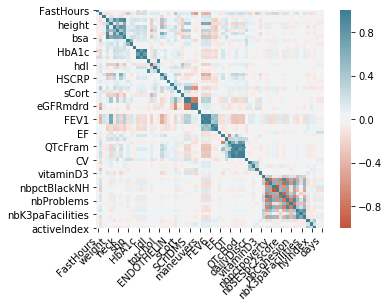

In [21]:
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
#Drop the variables that are highly correlated
# Create correlation matrix
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
df1.drop(to_drop, axis=1, inplace=True)

In [23]:
#df1

In [24]:
#Lets see variables with imbalanced data

In [25]:
df1.MajorScarAnt.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2634
Present      19
Name: MajorScarAnt, dtype: int64

In [26]:
df1.ConductionDefect.value_counts().head(5)
# Can drop this column as it has mostly No

No     2626
Yes      27
Name: ConductionDefect, dtype: int64

In [27]:
df1.MinorScarAnt.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2618
Present      35
Name: MinorScarAnt, dtype: int64

In [28]:
df1.RepolarAnt.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2540
Present     113
Name: RepolarAnt, dtype: int64

In [29]:
df1.MIant.value_counts().head(5)
# Can drop this column as it has mostly No

No     2634
Yes      19
Name: MIant, dtype: int64

In [30]:
df1.MajorScarPost.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2624
Present      29
Name: MajorScarPost, dtype: int64

In [31]:
df1.MinorScarPost.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2596
Present      57
Name: MinorScarPost, dtype: int64

In [32]:
df1.RepolarPost.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2612
Present      41
Name: RepolarPost, dtype: int64

In [33]:
df1.MIpost.value_counts().head(5)
# Can drop this column as it has mostly No

No     2624
Yes      29
Name: MIpost, dtype: int64

In [34]:
df1.MajorScarAntLat.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2648
Present       5
Name: MajorScarAntLat, dtype: int64

In [35]:
df1.MinorScarAntLat.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2624
Present      29
Name: MinorScarAntLat, dtype: int64

In [36]:
df1.RepolarAntLat.value_counts().head(5)
# Can drop this column as it has mostly Absent

Absent     2539
Present     114
Name: RepolarAntLat, dtype: int64

In [37]:
df1.MIAntLat.value_counts().head(5)
# Can drop this column as it has mostly No

No     2645
Yes       8
Name: MIAntLat, dtype: int64

In [38]:
df1.MIecg.value_counts().head(5)
# Can drop this column as it has mostly No

No     2590
Yes      63
Name: MIecg, dtype: int64

In [39]:
df1.Afib.value_counts().head(5)
# Can drop this column as it has mostly No

No     2642
Yes       5
Name: Afib, dtype: int64

In [40]:
df1.Aflutter.value_counts().head(5)
# Can drop this column as it has all No

No    2646
Name: Aflutter, dtype: int64

In [41]:
df1.LVHcv.value_counts().head(5)
# Can drop this column as it has mostly No

Absent     2413
Present     234
Name: LVHcv, dtype: int64

In [42]:
df1.speechLossEver.value_counts().head(5)
# Can drop this column as it has mostly No

No     2591
Yes      49
Name: speechLossEver, dtype: int64

In [43]:
df1.visionLossEver.value_counts().head(5)
# Can drop this column as it has mostly No

No     2553
Yes      89
Name: visionLossEver, dtype: int64

In [44]:
df1.doubleVisionEver.value_counts().head(5)
# Can drop this column as it has mostly No

No     2612
Yes      26
Name: doubleVisionEver, dtype: int64

In [45]:
df1.numbnessEver.value_counts().head(5)
# Can drop this column as it has mostly No

No     2489
Yes     150
Name: numbnessEver, dtype: int64

In [46]:
df1.paralysisEver.value_counts().head(5)
# Can drop this column as it has mostly No

No     2572
Yes      67
Name: paralysisEver, dtype: int64

In [47]:
df1.dizzynessEver.value_counts().head(5)
# Can drop this column as it has mostly No

No     2544
Yes      94
Name: dizzynessEver, dtype: int64

In [48]:
df1.strokeHx.value_counts().head(5)
# Can drop this column as it has mostly No

No     2579
Yes      74
Name: strokeHx, dtype: int64

In [49]:
df1.MIHx.value_counts().head(5)
# Can drop this column as it has mostly No

No     2545
Yes     108
Name: MIHx, dtype: int64

In [50]:
df1.CardiacProcHx.value_counts().head(5)
# Can drop this column as it has mostly No

No     2460
Yes     158
Name: CardiacProcHx, dtype: int64

In [51]:
df1.CHDHx.value_counts().head(5)
# Can drop this column as it has mostly No

No     2497
Yes     156
Name: CHDHx, dtype: int64

In [52]:
df1.CarotidAngioHx.value_counts().head(5)
# Can drop this column as it has all No

No    2652
Name: CarotidAngioHx, dtype: int64

In [53]:
df1.CVDHx.value_counts().head(5)
# Can drop this column as it has mostly No

No     2438
Yes     215
Name: CVDHx, dtype: int64

In [54]:
df1.PrivateIns.value_counts().head(5)
# Cant drop this column as it looks it has predictive power

Yes    1915
No      729
Name: PrivateIns, dtype: int64

In [55]:
df1.MedicaidIns.value_counts().head(5)
# Can drop this column as it has mostly No

No     2427
Yes     216
Name: MedicaidIns, dtype: int64

In [56]:
df1.MedicareIns.value_counts().head(5)
# Cant drop this column as it looks it has predictive power

No     2074
Yes     574
Name: MedicareIns, dtype: int64

In [57]:
df1.VAIns.value_counts().head(5)
# Can drop this column as it has mostly No

No     2445
Yes     189
Name: VAIns, dtype: int64

In [58]:
df1.InsuranceType.value_counts().head(5)
# Can drop this column as it does not have predictive power

Private Only           1520
Uninsured               332
Private & Medicare      226
Medicare Only           173
Medicare & Medicaid     105
Name: InsuranceType, dtype: int64

In [59]:
df1.Insured.value_counts().head(5)
# Can drop this column as it has mostly No

Yes    2315
No      332
Name: Insured, dtype: int64

In [60]:
df1.PublicIns.value_counts().head(5)
# Can drop this column as it has mostly No

No     2312
Yes     336
Name: PublicIns, dtype: int64

In [61]:
df1.PrivatePublicIns.value_counts().head(5)
# Can drop this column as it does not have predictive power

Private Only        1656
Public Only          336
Uninsured            332
Private & Public     323
Name: PrivatePublicIns, dtype: int64

In [62]:
#    df1.nutrition3cat.value_counts().head(5)
# Cant drop this column as it looks it has predictive power

In [63]:
df1.SMK3cat.value_counts().head(5)
# Cant drop this column as it looks it has predictive power

Ideal Health           2279
Poor Health             306
Intermediate Health      27
Name: SMK3cat, dtype: int64

In [64]:
df1.BMI3cat.value_counts().head(5)
# Cant drop this column as it looks it has predictive power

Poor Health            1443
Intermediate Health     864
Ideal Health            342
Name: BMI3cat, dtype: int64

In [65]:
df1.ageIneligible.value_counts().head(5)
# Can drop this column as it has all No

No    2650
Name: ageIneligible, dtype: int64

In [66]:
df1.DMmedsOral.value_counts().head(5)
# Can drop this column as it has mostly No

No     2215
Yes     255
Name: DMmedsOral, dtype: int64

In [67]:
df1.DMmedsIns.value_counts().head(5)
# Can drop this column as it has mostly No

No     2345
Yes     118
Name: DMmedsIns, dtype: int64

In [68]:
df1.DMmeds.value_counts().head(5)
# Can drop this column as it has mostly No

No     2287
Yes     343
Name: DMmeds, dtype: int64

In [69]:
df1.statinMeds.value_counts().head(5)
# Can drop this column as it has mostly No

No     2290
Yes     338
Name: statinMeds, dtype: int64

In [70]:
df1.hrtMeds.value_counts().head(5)
# Can drop this column as it has mostly No

No     2023
Yes     486
Name: hrtMeds, dtype: int64

In [71]:
df1.betaBlkMeds.value_counts().head(5)
# Can drop this column as it has mostly No

No     2203
Yes     271
Name: betaBlkMeds, dtype: int64

In [72]:
df1.calBlkMeds.value_counts().head(5)
# Can drop this column as it has mostly No

No     1993
Yes     484
Name: calBlkMeds, dtype: int64

In [73]:
df1.diureticMeds.value_counts().head(5)
# Cant drop this column as it looks like it has predictive power

No     1661
Yes     836
Name: diureticMeds, dtype: int64

In [74]:
df1.antiArythMeds.value_counts().head(5)
# Can drop this column as it has mostly No

No     2531
Yes      98
Name: antiArythMeds, dtype: int64

In [75]:
df1.BPmedsSelf.value_counts().head(5)
# Can be dropped as it seems its correlated to BPmeds

No     1369
Yes    1239
Name: BPmedsSelf, dtype: int64

In [76]:
df1.DMMedType.value_counts().head(5)
# Cant drop this column as it looks like it does not predictive power

No Diabetic Medications    2144
Oral Only                   201
Insulin Only                 71
Both Oral and Insulin        44
Name: DMMedType, dtype: int64

In [77]:
df1.dmMedsSelf.value_counts().head(5)
# Can drop this column as it has mostly No

No     2268
Yes     338
Name: dmMedsSelf, dtype: int64

In [78]:
df1.statinMedsSelf.value_counts().head(5)
# Can drop this column as it has mostly No

No     2282
Yes     320
Name: statinMedsSelf, dtype: int64

In [79]:
df1.antiArythMedsSelf.value_counts().head(5)
# Can drop this column as it has mostly No

No     2510
Yes      96
Name: antiArythMedsSelf, dtype: int64

In [80]:
df1.BPmeds.value_counts().head(5)
# Cant drop this column as it looks like it has predictive power

Yes    1331
No     1302
Name: BPmeds, dtype: int64

In [81]:
df1.BPjnc7.value_counts().head(5)
# Cant drop this column as it looks like it has predictive power

Pre-HTN         1297
Normal           890
Stage I HTN      372
Stage II HTN      90
Name: BPjnc7, dtype: int64

In [82]:
df1.asthma.value_counts().head(5)
# Can drop this column as it has mostly Never

Never      2393
Current     136
Former      109
Name: asthma, dtype: int64

In [83]:
df1.LVdilation.value_counts().head(5)
# Can drop this column as it has mostly None

None        2427
Mild         122
Moderate      16
Name: LVdilation, dtype: int64

In [84]:
df1.EF3cat.value_counts().head(5)
# Cant drop this column as it looks like it has predictive power

Normal       1828
Preserved     729
Reduced        11
Name: EF3cat, dtype: int64

In [85]:
df1.alcw.value_counts().head(5)
# Can drop this column as it has mostly 0.00

0.00    1417
1.00     110
0.25      92
0.04      76
0.50      76
Name: alcw, dtype: int64

In [86]:
#Dropping the cloumns from the above analysis
df1.drop(['MajorScarAnt', 'ageIneligible', 'DMmedsOral', 'LVdilation', 'asthma', 'DMmedsIns', 'BPmedsSelf', 'antiArythMedsSelf', 'statinMedsSelf', 'calBlkMeds', 'DMMedType', 'dmMedsSelf', 'antiArythMeds', 'betaBlkMeds', 'DMmeds', 'statinMeds', 'hrtMeds', 'ConductionDefect', 'MinorScarAnt', 'RepolarAnt', 'MIant', 'MajorScarPost', 'MinorScarPost', 'RepolarPost', 'MIpost', 'MajorScarAntLat', 'MinorScarAntLat', 'RepolarAntLat', 'MIAntLat', 'MIecg', 'Afib', 'Aflutter', 'LVHcv', 'speechLossEver', 'visionLossEver', 'doubleVisionEver', 'numbnessEver', 'paralysisEver', 'dizzynessEver', 'strokeHx', 'MIHx', 'CardiacProcHx', 'CHDHx', 'CarotidAngioHx', 'CVDHx', 'MedicaidIns', 'VAIns', 'InsuranceType', 'Insured', 'PublicIns', 'PrivatePublicIns'] ,1, inplace=True)

In [87]:
#df1

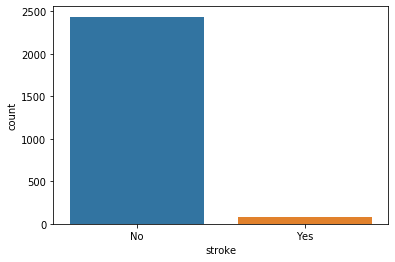

In [88]:
# Now lets see the target variable
#Lets plot and see
sns.countplot(df1["stroke"]);
#looks like highly imbalanced data

In [89]:
B_Val = {"No":0, "Yes":1}   
df1= df1.replace({"stroke": B_Val})

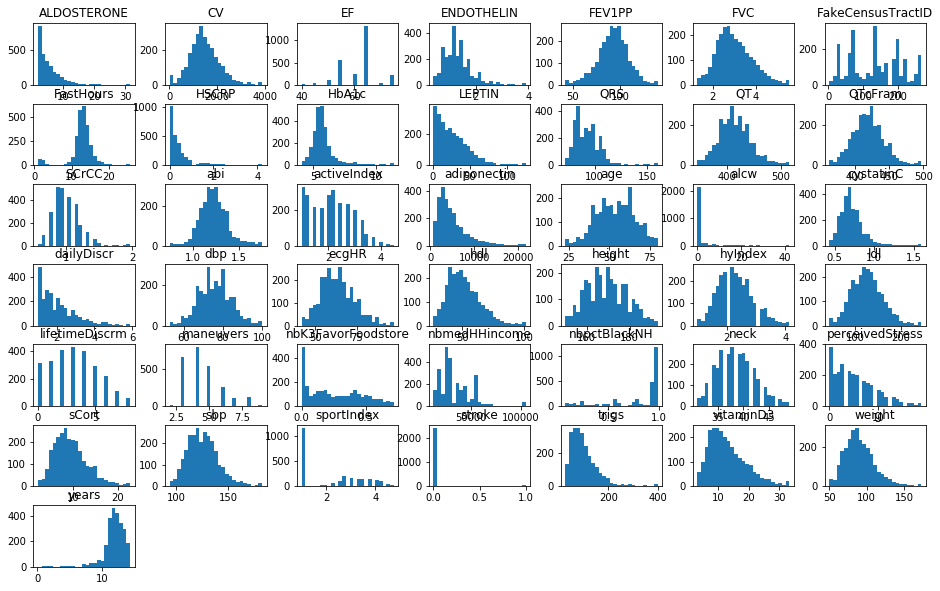

In [90]:
#lets see the distributions
x = df1.hist(bins=25, grid=False, figsize=(16,10))


In [91]:
df1.skew()

FastHours            -1.135588
age                  -0.120855
alcw                  5.241879
weight                0.918814
height                0.213226
neck                  0.322707
sbp                   0.713372
dbp                   0.104765
abi                   0.414777
HbA1c                 2.346583
ldl                   0.405792
hdl                   0.891123
trigs                 1.959107
LEPTIN                1.368943
HSCRP                 2.904819
ENDOTHELIN            1.326571
ALDOSTERONE           2.438099
cystatinC             1.919133
sCort                 0.811967
adiponectin           1.832353
SCrCC                 1.156224
maneuvers             0.968935
FVC                   0.525859
FEV1PP               -0.208131
EF                   -0.364688
ecgHR                 0.517018
QRS                   1.768921
QT                    0.467368
QTcFram               0.371552
CV                    0.540197
dailyDiscr            1.193017
lifetimeDiscrm        0.284822
perceive

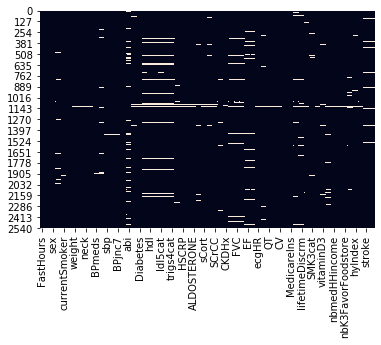

In [92]:
#Checking for missing values
sns.heatmap(df1.isnull(), cbar=False);

In [93]:
df1.isnull().sum(axis=0)

FastHours          6
age                0
sex                0
alcw              71
currentSmoker     18
                ... 
sportIndex       117
hyIndex           26
activeIndex       14
stroke           139
years            139
Length: 62, dtype: int64

In [94]:
#df1

In [95]:
# Missing value treatment for numeric variables
df1.fillna(df1.median(),inplace = True)

In [96]:
df1.isnull().sum(axis=0)

FastHours         0
age               0
sex               0
alcw              0
currentSmoker    18
                 ..
sportIndex        0
hyIndex           0
activeIndex       0
stroke            0
years             0
Length: 62, dtype: int64

In [97]:
df1.dtypes

FastHours        float64
age                int64
sex               object
alcw             float64
currentSmoker     object
                  ...   
sportIndex       float64
hyIndex          float64
activeIndex      float64
stroke           float64
years            float64
Length: 62, dtype: object

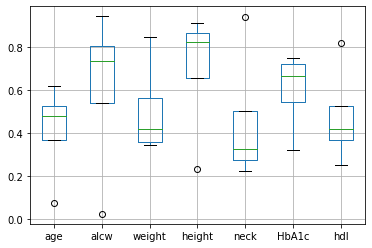

In [98]:
#Lets see the outliers by plotting box plots
df_box1 = pd.DataFrame(data = np.random.random(size=(4,7)), columns = ['age', 'alcw','weight', 'height', 'neck', 'HbA1c',
                                                                      'hdl'])

df_box1.boxplot()

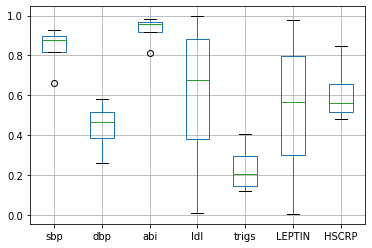

In [99]:
#Lets see the outliers by plotting box plots
df_box2 = pd.DataFrame(data = np.random.random(size=(4,7)), columns = ['sbp', 'dbp','abi', 'ldl', 'trigs', 'LEPTIN', 
                                                                       'HSCRP'])

df_box2.boxplot()

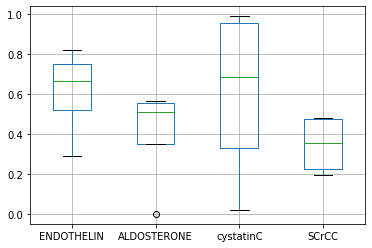

In [100]:
#Lets see the outliers by plotting box plots
df_box3 = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['ENDOTHELIN', 'ALDOSTERONE', 'cystatinC', 'SCrCC'])
                                                                      

df_box3.boxplot()

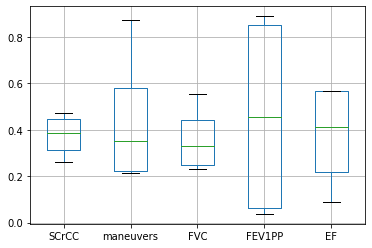

In [101]:
#Lets see the outliers by plotting box plots
df_box4 = pd.DataFrame(data = np.random.random(size=(4,5)), columns = ['SCrCC', 'maneuvers', 'FVC', 'FEV1PP', 'EF'])
                                                                      

df_box4.boxplot()

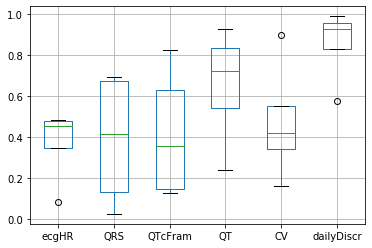

In [102]:
#Lets see the outliers by plotting box plots
df_box5 = pd.DataFrame(data = np.random.random(size=(4,6)), columns = ['ecgHR', 'QRS', 'QTcFram', 'QT', 'CV', 'dailyDiscr'])
                                                                      

df_box5.boxplot()

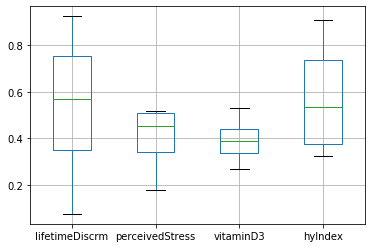

In [103]:
#Lets see the outliers by plotting box plots
df_box6 = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['lifetimeDiscrm', 'perceivedStress', 'vitaminD3',
                                                                       'hyIndex'])
                                                                      

df_box6.boxplot()

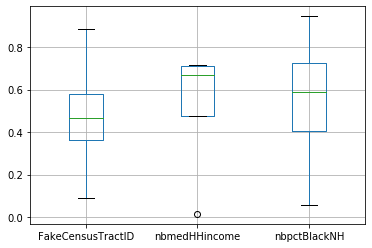

In [104]:
#Lets see the outliers by plotting box plots
df_box7 = pd.DataFrame(data = np.random.random(size=(4,3)),columns = ['FakeCensusTractID', 'nbmedHHincome', 'nbpctBlackNH'])
                                                                      

df_box7.boxplot()

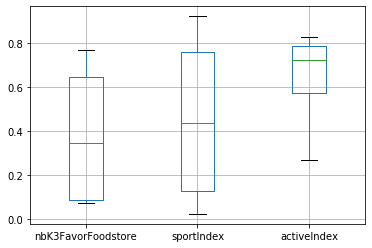

In [105]:
#Lets see the outliers by plotting box plots
df_box8 = pd.DataFrame(data = np.random.random(size=(4,3)),columns = ['nbK3FavorFoodstore', 'sportIndex', 'activeIndex'])
                                                                      

df_box8.boxplot()

In [106]:
#As stroke is our target variable, dropping the records where stroke value is missing
df1 = df1[pd.notnull(df1['stroke'])]

In [107]:
df1.shape

(2653, 62)

# Logistic Regression

In [108]:
#import the packages that we need
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [109]:
#Create data with only the features and dependent variables.
feature_cols = ['FastHours','age','sex','alcw','currentSmoker','everSmoker','weight','height','neck','OBESITY3cat',
                'BPmeds','diureticMeds','sbp','dbp','BPjnc7','HTN','abi','HbA1c','Diabetes','ldl','hdl','trigs',
                'ldl5cat','hdl3cat','trigs4cat','LEPTIN','HSCRP','ENDOTHELIN','ALDOSTERONE','cystatinC','sCort',
                'adiponectin','SCrCC','DialysisEver','CKDHx','maneuvers','FVC','FEV1PP','EF','EF3cat','ecgHR','QRS',
                'QT','QTcFram','CV','PrivateIns','MedicareIns','dailyDiscr','lifetimeDiscrm','perceivedStress',
                'SMK3cat','BMI3cat','vitaminD3','FakeCensusTractID','nbmedHHincome','nbpctBlackNH',
                'nbK3FavorFoodstore','sportIndex','hyIndex','activeIndex','years','stroke']
model1 =  df1[feature_cols]

# convert selected features do dummies
model1 = pd.get_dummies(model1, columns=["sex", "currentSmoker","everSmoker", "OBESITY3cat",
                                             "BPmeds", "diureticMeds", "BPjnc7", "HTN", "Diabetes",
                                             "ldl5cat", "hdl3cat", "trigs4cat", "DialysisEver", "CKDHx",
                                             "EF3cat","PrivateIns","MedicareIns", "SMK3cat", "BMI3cat"], drop_first=True)

# set x and y
X = model1.drop('stroke', axis =1)
y = model1['stroke']

# train test splot
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state =123)

#handling missing values
x_train.fillna(x_train.median(),inplace = True)

#handling outliers
from sklearn.preprocessing import StandardScaler

# Create an scaler object 
scaler = StandardScaler()

# Train on the training features
scaler.fit(x_train)

# Transform training data
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)

# set the model
LR = LogisticRegression()

# fit model
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
#getting the coefficients:

a = model1.columns.drop('stroke')
coefficient = LR.coef_[0]
pd.DataFrame([a,coefficient],index = ['Cols','coefficient']).transpose()

,Cols,coefficient
0,FastHours,0.195292
1,age,0.303807
2,alcw,-0.25785
3,weight,-0.320967
4,height,0.0232332
...,...,...
68,MedicareIns_Yes,0.510217
69,SMK3cat_Intermediate Health,-0.13156
70,SMK3cat_Poor Health,0.212398
71,BMI3cat_Intermediate Health,0.122375


In [111]:
#Now follow the same steps for x_test data that we did for x_train data.
#handling missing values
x_test.fillna(x_test.median(),inplace = True)


#handling outliers
from sklearn.preprocessing import StandardScaler

# Create an scaler object 
scaler = StandardScaler()

# Train on the training features
scaler.fit(x_test)

# Transform training data
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

#Use the Model to predict on x_test and evaluate the model using metric
y_pred_test = LR.predict(x_test)
y_pred_train = LR.predict(x_train)

In [112]:
#Lets see ROC for test
metrics.roc_auc_score(y_test,y_pred_test)

0.6612487100103198

In [113]:
#Lets see ROC for train
metrics.roc_auc_score(y_train,y_pred_train)

0.7118180736004354

In [114]:
#confusion matrix for test
metrics.confusion_matrix(y_test,y_pred_test)

array([[639,   7],
       [ 12,   6]], dtype=int64)

In [115]:
#confusion matrix for train
metrics.confusion_matrix(y_train,y_pred_train)

array([[1923,    5],
       [  35,   26]], dtype=int64)

In [116]:
#Lets see accuracy for test
metrics.accuracy_score(y_test,y_pred_test)

0.9713855421686747

In [117]:
#Lets see accuracy for train
metrics.accuracy_score(y_train,y_pred_train)

0.9798893916540975

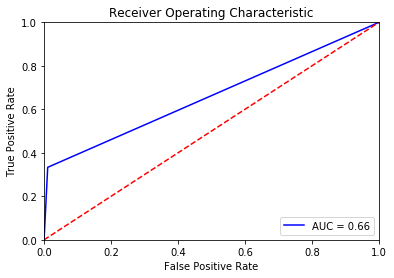

In [118]:
#Plot the ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# K-Folds cross-validation

In [119]:
#import the packages that we need
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

#handling missing values
X.fillna(X.median(),inplace = True)


#handling outliers
from sklearn.preprocessing import StandardScaler

# Create an scaler object 
scaler = StandardScaler()

# Train on the training features
scaler.fit(X)

# Transform training data
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

# set the model
LR1 = LogisticRegression()

# fit model
cross_val_score(LR1, X, y, cv=5)
       

array([0.97928437, 0.96798493, 0.97363465, 0.98116761, 0.97353497])

In [120]:
# predictions
preds = cross_val_predict(LR1, X, y, cv=5)

In [121]:
#lets see ROC
metrics.roc_auc_score(y, preds)

0.6804363006894653

In [122]:
#confusion matrix for test
metrics.confusion_matrix(y_test,y_pred_test)

array([[639,   7],
       [ 12,   6]], dtype=int64)

In [123]:
#confusion matrix for train
metrics.confusion_matrix(y_train,y_pred_train)

array([[1923,    5],
       [  35,   26]], dtype=int64)

In [124]:
#Lets see accuracy for test
metrics.accuracy_score(y_test,y_pred_test)

0.9713855421686747

In [125]:
#Lets see accuracy for train
metrics.accuracy_score(y_train,y_pred_train)

0.9798893916540975

# Logistic Regression with SGD(stochastic gradient descent)

In [126]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

pip = Pipeline([('model', SGDClassifier(loss='log', max_iter=500, tol=1e-3, random_state=123, warm_start=False))])

#Hyper parameters

param  = {
    'model__alpha': [1, 2, 5],
    'model__penalty': ['l1', 'l2']
}


In [127]:
#Set the model
from sklearn.model_selection import GridSearchCV
sgdlr = GridSearchCV(estimator=pip, param_grid=param, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [128]:
#fit the model
sgdlr.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
                                                      loss='log', max_iter=500,
                                                      n_iter_no_change=5,
                                                      n_jobs=None, penalty='l2',
                                  

In [129]:
sgdlr_estimator = sgdlr.best_estimator_
print('ROC: ', sgdlr.best_score_)
print('For parameters: \n', sgdlr.best_params_)

ROC:  0.8825982034053115
For parameters: 
 {'model__alpha': 1, 'model__penalty': 'l2'}


In [130]:
y_pred_sgdlr = sgdlr_estimator.predict(x_test)
y_prob_sgdlr = sgdlr_estimator.predict_proba(x_test)[:,1]

In [131]:
y_train_pred_sgdlr = sgdlr_estimator.predict(x_train)
y_train_prob_sgdlr = sgdlr_estimator.predict_proba(x_train)[:,1]

# Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=123,max_features='sqrt') 

#Hyper parameters
param_rf = {
    'class_weight': [{0:1, 1:1}]
}


In [133]:
#Set the model
grid_rf = GridSearchCV(estimator=rf, param_grid=param_rf, scoring='roc_auc',n_jobs=-1,pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [134]:
#fit the model
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=123,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'class_weight': [{0:

In [135]:
rf_estimator = grid_rf.best_estimator_
print('ROC: ', grid_rf.best_score_)
print('For parameters: \n', grid_rf.best_params_)

ROC:  0.8557698404028088
For parameters: 
 {'class_weight': {0: 1, 1: 1}}


In [136]:
y_pred_rf = rf_estimator.predict(x_test)
y_prob_rf = rf_estimator.predict_proba(x_test)[:,1]

In [137]:
y_train_pred_rf = rf_estimator.predict(x_train)
y_train_prob_rf = rf_estimator.predict_proba(x_train)[:,1]

# KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [139]:
#creating the pipeline

pip_knn = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))   
])

# hyper parameters
param_knn = {
    'lda__n_components': range(3,10),
    'model__n_neighbors': [5, 30, 100]
}

In [140]:
# setup the model
grid_knn = GridSearchCV(estimator=pip_knn, param_grid=param_knn, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [141]:
#fit the model
grid_knn.fit(x_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('lda',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='svd',
                                                                   store_covariance=False,
                                                                   tol=0.0001)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_pa

In [142]:
knn_estimator = grid_knn.best_estimator_
print('ROC: ', grid_knn.best_score_)
print('For parameters: \n', grid_knn.best_params_)

ROC:  0.8953685663008573
For parameters: 
 {'lda__n_components': 3, 'model__n_neighbors': 100}


In [143]:
y_pred_knn = knn_estimator.predict(x_test)
y_prob_knn = knn_estimator.predict_proba(x_test)[:,1]

In [144]:
y_train_pred_knn = knn_estimator.predict(x_train)
y_train_prob_knn = knn_estimator.predict_proba(x_train)[:,1]

# Model Comparison using ROC

In [145]:
best_rocs = [sgdlr.best_score_, grid_rf.best_score_,grid_knn.best_score_]
roc_tbl = pd.DataFrame({"AUROC":best_rocs,"Algorithm":["SGD Logistic Regression",
"RandomForest","KNeighboors"]})
roc_tbl

,AUROC,Algorithm
0,0.882598,SGD Logistic Regression
1,0.855770,RandomForest
2,0.895369,KNeighboors


In [146]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer, roc_auc_score,accuracy_score, roc_curve
#create a function for evaluation
def evl(X_train, X_test, Y_train, Y_test, Y_train_pred, Y_train_prob, Y_pred, Y_prob):
    print("ROC AUC")
    print("Training Set:", roc_auc_score(Y_train, Y_train_prob))
    print("Test Set:", roc_auc_score(Y_test, Y_prob))
    
    TP, FN, TN, FP = confusion_matrix(Y_test, Y_pred).ravel()
    print("\nConfusion Matrix")
    print("True Positive:", TP)
    print("False Negative:", FN)
    print("True Negative:", TN)
    print("False Positive:", FP)
    
    print("\nAccuracy")
    print("Training Set:", accuracy_score(Y_train, Y_train_pred))
    print("Test Set:", accuracy_score(Y_test, Y_pred))

    

#creating a function for ploting ROC curve    
def plot_ROC(X_test, Y_test, Y_prob):
    
    #Y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = roc_curve(Y_test, Y_prob, pos_label=1)
    roc_auc = roc_auc_score(Y_test, Y_prob)
    # threshold = 0.1~0.5
    x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
    x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

    fig = plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2)
    plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
    plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Area = {:.2f})'.format(roc_auc))
    plt.legend(loc="lower right")
    plt.show()    

Logistic Regression with SGD
ROC AUC
Training Set: 0.9195973063056935
Test Set: 0.892844857241142

Confusion Matrix
True Positive: 646
False Negative: 0
True Negative: 18
False Positive: 0

Accuracy
Training Set: 0.9693313222724987
Test Set: 0.9728915662650602


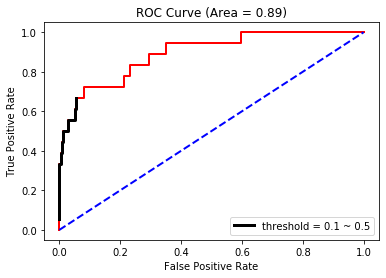

In [147]:
print('Logistic Regression with SGD')
evl(x_train, x_test, y_train, y_test, y_train_pred_sgdlr, y_train_prob_sgdlr, y_pred_sgdlr, y_prob_sgdlr)
plot_ROC(x_test, y_test, y_prob_sgdlr)

Random Forest
ROC AUC
Training Set: 1.0
Test Set: 0.8126504987960095

Confusion Matrix
True Positive: 646
False Negative: 0
True Negative: 17
False Positive: 1

Accuracy
Training Set: 1.0
Test Set: 0.9743975903614458


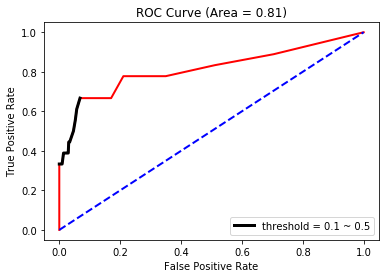

In [148]:
print('Random Forest')
evl(x_train, x_test, y_train, y_test, y_train_pred_rf, y_train_prob_rf, y_pred_rf, y_prob_rf)
plot_ROC(x_test, y_test, y_prob_rf)

KNN
ROC AUC
Training Set: 0.9573540915583973
Test Set: 0.8279583763329894

Confusion Matrix
True Positive: 646
False Negative: 0
True Negative: 18
False Positive: 0

Accuracy
Training Set: 0.9693313222724987
Test Set: 0.9728915662650602


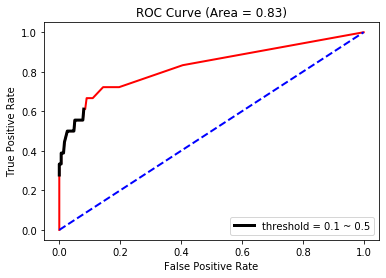

In [149]:
print('KNN')
evl(x_train, x_test, y_train, y_test, y_train_pred_knn, y_train_prob_knn, y_pred_knn, y_prob_knn)
plot_ROC(x_test, y_test, y_prob_knn)

## XGBoost

In [150]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

In [151]:
#Lets do regex on the feature variables
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
#Create data with only the features and dependent variables.
feature_cols = ['FastHours','age','sex','alcw','currentSmoker','everSmoker','weight','height','neck','OBESITY3cat',
                'BPmeds','diureticMeds','sbp','dbp','BPjnc7','HTN','abi','HbA1c','Diabetes','ldl','hdl','trigs',
                'ldl5cat','hdl3cat','trigs4cat','LEPTIN','HSCRP','ENDOTHELIN','ALDOSTERONE','cystatinC','sCort',
                'adiponectin','SCrCC','DialysisEver','CKDHx','maneuvers','FVC','FEV1PP','EF','EF3cat','ecgHR','QRS',
                'QT','QTcFram','CV','PrivateIns','MedicareIns','dailyDiscr','lifetimeDiscrm','perceivedStress',
                'SMK3cat','BMI3cat','vitaminD3','FakeCensusTractID','nbmedHHincome','nbpctBlackNH',
                'nbK3FavorFoodstore','sportIndex','hyIndex','activeIndex','years','stroke']

model1 =  df1[feature_cols]

# convert selected features do dummies
model1 = pd.get_dummies(model1, columns=['sex', 'currentSmoker','everSmoker', 'OBESITY3cat',
                                             'BPmeds', 'diureticMeds', 'BPjnc7', 'HTN', 'Diabetes',
                                           'ldl5cat', 'hdl3cat', 'trigs4cat', 'DialysisEver', 'CKDHx',
                                            'EF3cat','PrivateIns','MedicareIns', 'SMK3cat', 'BMI3cat'], drop_first=True)

# set x and y
X = model1.drop('stroke', axis =1)
y = model1['stroke']
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in
                   X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in
                  X_test.columns.values]
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [152]:
#Now follow the same steps for x_test data that we did for x_train data.
#handling missing values
x_test.fillna(x_test.median(),inplace = True)


#handling outliers
from sklearn.preprocessing import StandardScaler

# Create an scaler object 
scaler = StandardScaler()

# Train on the training features
scaler.fit(x_test)

# Transform training data
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in
                   X_train.columns.values]
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in
                  X_test.columns.values]

#Use the Model to predict on x_test and evaluate the model using metric
y_pred_train = xg.predict(X_train)
y_pred_test = xg.predict(X_test)

In [153]:
X_test.shape

(876, 73)

In [154]:
y_pred_test.shape

(876,)

In [155]:
# make predictions for test data
y_pred_test = xg.predict(X_test)
predictions_test = [round(value) for value in y_pred_test]

In [156]:
# evaluate predictions for test
accuracy = accuracy_score(y_test, predictions_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.95%


In [157]:
# make predictions for test data
y_pred_train = xg.predict(X_train)
predictions_train = [round(value) for value in y_pred_train]

In [158]:
# evaluate predictions for train
accuracy = accuracy_score(y_train, predictions_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.72%


In [159]:
#confusion matrix for test
metrics.confusion_matrix(y_test,y_pred_test)

array([[852,   1],
       [ 17,   6]], dtype=int64)

In [160]:
#confusion matrix for train
metrics.confusion_matrix(y_train,y_pred_train)

array([[1721,    0],
       [   5,   51]], dtype=int64)

In [161]:
#Lets see ROC for test
metrics.roc_auc_score(y_test, y_pred_test)

0.6298486161374178

In [162]:
#Lets see ROC for train
metrics.roc_auc_score(y_train, y_pred_train)

0.9553571428571428

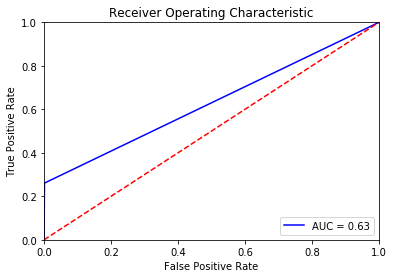

In [163]:
#Plot the ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()